# Exploratory data analysis of Urinary Tract Infection

My dataset domain is Urinary tract infection disease. UTI is an infection in any part of the urinary system-  kidneys, bladder or urethra. I have taken the dataset as UTI.csv and my task is to do its visualization and EDA.  
EDA (Exploratory Data Analysis) is an approach of analyzing data sets to summarize their main characteristics, often using statistical graphics and other data visualization methods.

In [1]:
# Uploading files from my computer
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [2]:
# Importing the libraries
import pandas
import numpy
import matplotlib.pyplot as plt
import seaborn
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
# Importing our dataset Urinary tract infection.
data = pandas.read_csv('/content/gdrive/My Drive/Datasets/UTI.csv')
# Data shuffling to avoid the chances of data biasness.
data= data.sample(frac= 1)
# Reading names of all the columns from our dataset
data.columns

Index(['Temperature of patient', 'Occurrence of nausea', 'Lumbar pain',
       'Urine pushing (continuous need for urination)', 'Micturition pains',
       'Burning of urethra, itch, swelling of urethra outlet',
       'Inflammation of urinary bladder', 'Nephritis of renal pelvis origin'],
      dtype='object')

### Description of the variables :
1. **Temperature of patient**: body temperature of patient in degree celcius.
2. **Nausea**: it is stomach discomfort and the sensation of wanting to vomit.
3. **Lumbar pain**: pain in the lower back.
4. **Urine pushing**: in men, the need to push urine may be a sign of bladder outlet obstruction.
5. **Micturition pains** (Painful urination (dysuria)): it is discomfort or burning with urination, usually felt in the tube (urethra) that carries urine out of our bladder or the area surrounding our genitals (perineum).
7. **Inflammation of urinary bladder**: Cystitis is the medical term for inflammation of the bladder. Most of the time, the inflammation is caused by a bacterial infection.
8. **Nephritis of renal pelvis origin**: it is a condition in which the nephrons, the functional units of the kidneys, become inflamed. This inflammation can adversely affect kidney function.

In [3]:
# Total number of columns in our dataset
len(data.columns)

8

In [4]:
# Shortening the names of columns for the purpose of ease in coding by renaming the columns
data.rename(columns= {'Temperature of patient':'Temperature'}, inplace= True)
data.rename(columns= {'Occurrence of nausea': 'Nausea'}, inplace= True)
data.rename(columns= {'Urine pushing (continuous need for urination)': 'Urine pushing'}, inplace= True)
data.rename(columns= {'Burning of urethra, itch, swelling of urethra outlet': 'Burning'}, inplace= True)
data.rename(columns= {'Inflammation of urinary bladder': 'Inflammation in urinary bladder'}, inplace= True)

In [5]:
# Updated column names
data.columns

Index(['Temperature', 'Nausea', 'Lumbar pain', 'Urine pushing',
       'Micturition pains', 'Burning', 'Inflammation in urinary bladder',
       'Nephritis of renal pelvis origin'],
      dtype='object')

In [6]:
# Reading first three rows of the dataframe
data.head(3)

,Temperature,Nausea,Lumbar pain,Urine pushing,Micturition pains,Burning,Inflammation in urinary bladder,Nephritis of renal pelvis origin
22,37.0,no,yes,no,no,no,no,no
88,40.5,yes,yes,yes,yes,no,yes,yes
23,37.0,no,no,yes,yes,yes,yes,no


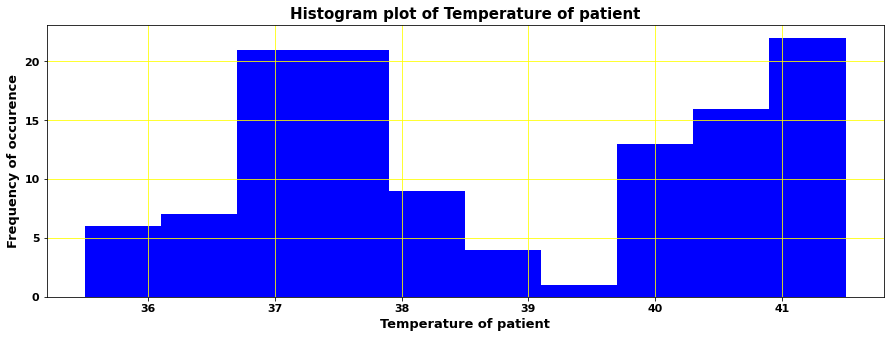

In [7]:
# Plotting histogram of Temperature variable
# Histogram acts as a frequency counter for a particular variable
plt.figure(figsize= (15,5))
plt.hist(data['Temperature'], color= 'blue')
plt.title('Histogram plot of Temperature of patient', fontsize= 15, fontweight= 'bold')
plt.xlabel('Temperature of patient', fontsize= 13, fontweight= 'bold')
plt.ylabel('Frequency of occurence', fontsize= 13, fontweight= 'bold')
plt.xticks(fontsize= 11, fontweight= 'bold')
plt.yticks(fontsize= 11, fontweight= 'bold')
plt.grid(color= 'yellow')
plt.show()

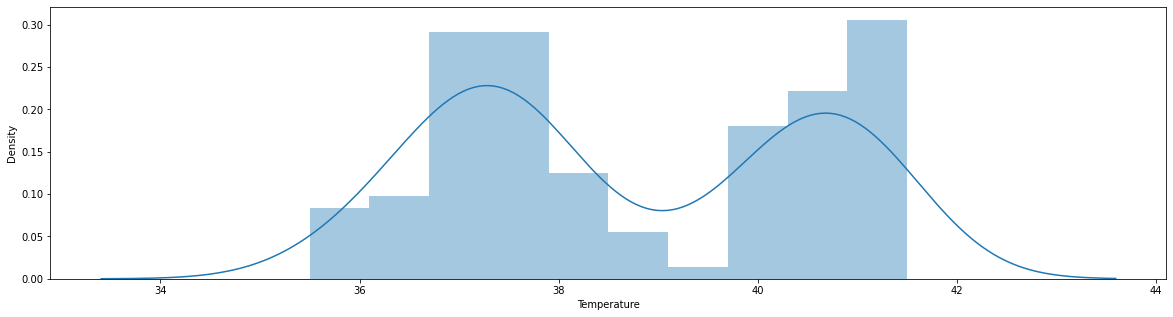

In [8]:
# Distribution plot for Temperature variable in our data. 
# kde (Kernel Density Estimate) : It gives us probability density function
# bins denotes in how many parts our data is distributed
import warnings
warnings.filterwarnings('ignore')
plt.figure(figsize= (20,5))
seaborn.distplot(data['Temperature'], bins=10, kde=True)
plt.show()

In [9]:
# Data mapping : 1 for yes and 0 for no. This is done so that we can do further analysis.
data['Nausea']= data['Nausea'].map({'no': 0, 'yes': 1})
data['Lumbar pain']= data['Lumbar pain'].map({'no': 0, 'yes': 1})
data['Urine pushing']= data['Urine pushing'].map({'no': 0, 'yes': 1})
data['Micturition pains']= data['Micturition pains'].map({'no': 0, 'yes': 1})
data['Burning']= data['Burning'].map({'no': 0, 'yes': 1})
data['Inflammation in urinary bladder']= data['Inflammation in urinary bladder'].map({'no': 0, 'yes': 1})
data['Nephritis of renal pelvis origin']= data['Nephritis of renal pelvis origin'].map({'no': 0, 'yes': 1})

In [10]:
# Reading first three rows of the dataframe
data.head(3)

,Temperature,Nausea,Lumbar pain,Urine pushing,Micturition pains,Burning,Inflammation in urinary bladder,Nephritis of renal pelvis origin
22,37.0,0,1,0,0,0,0,0
88,40.5,1,1,1,1,0,1,1
23,37.0,0,0,1,1,1,1,0


In [11]:
# Datatypes of every different variables in the dataframe
data.dtypes

Temperature                         float64
Nausea                                int64
Lumbar pain                           int64
Urine pushing                         int64
Micturition pains                     int64
Burning                               int64
Inflammation in urinary bladder       int64
Nephritis of renal pelvis origin      int64
dtype: object

In [12]:
# Datatype of whole dataframe
type(data)

pandas.core.frame.DataFrame

In [13]:
# Brief information about our dataframe like, nullness, length, and datatypes of the variables.
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 120 entries, 22 to 68
Data columns (total 8 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Temperature                       120 non-null    float64
 1   Nausea                            120 non-null    int64  
 2   Lumbar pain                       120 non-null    int64  
 3   Urine pushing                     120 non-null    int64  
 4   Micturition pains                 120 non-null    int64  
 5   Burning                           120 non-null    int64  
 6   Inflammation in urinary bladder   120 non-null    int64  
 7   Nephritis of renal pelvis origin  120 non-null    int64  
dtypes: float64(1), int64(7)
memory usage: 8.4 KB


In [14]:
# Shape of dataset
data.shape

(120, 8)

In [15]:
# Number of unique values in dataset
data.nunique()

Temperature                         44
Nausea                               2
Lumbar pain                          2
Urine pushing                        2
Micturition pains                    2
Burning                              2
Inflammation in urinary bladder      2
Nephritis of renal pelvis origin     2
dtype: int64

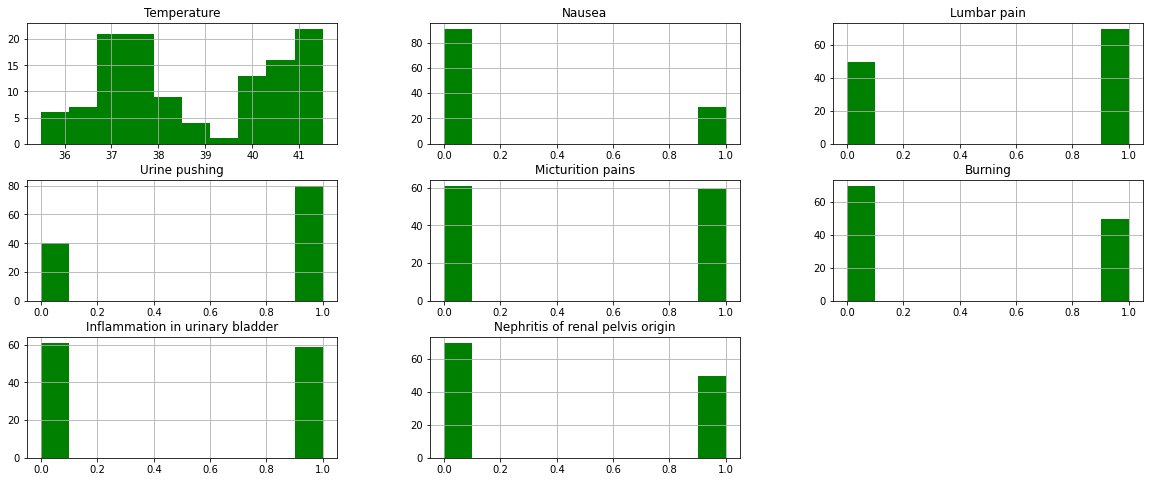

In [16]:
# Histograms in whole dataset
data.hist(figsize= (20, 8), color= 'green')
plt.show()

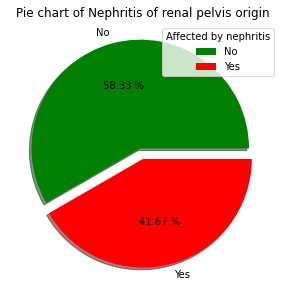

In [17]:
# Pie chart of Nephritis of renal pelvis origin
labels= ['No', 'Yes']
features= [70, 50]
explode = [0.1, 0]
plt.figure(figsize= (20, 5))
plt.title('Pie chart of Nephritis of renal pelvis origin')
plt.pie(features, labels= labels, startangle = 0, explode = explode, shadow = True, colors= ['green', 'red'], autopct='%0.2f %%')
plt.legend(title= 'Affected by nephritis')
plt.show()

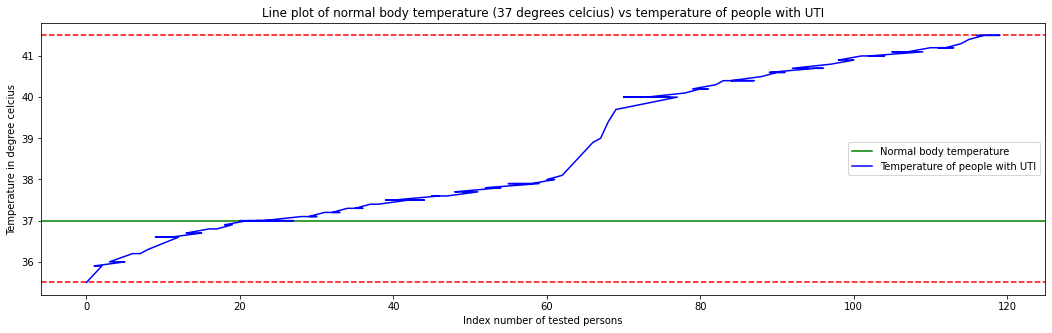

In [18]:
# Line plot of normal body temperature (37 degrees celcius) vs temperature of people with UTI
plt.figure(figsize= (18, 5) )
plt.axhline(y = 37, color = 'green', linestyle = '-', linewidth= 1.5, label= 'Normal body temperature')
plt.axhline(y = data['Temperature'].min(), color = 'red', linestyle = '--', linewidth= 1.5)
plt.axhline(y = data['Temperature'].max(), color = 'red', linestyle = '--', linewidth= 1.5)
data['Temperature'].sort_values().plot(color= 'blue', label= 'Temperature of people with UTI')
plt.title('Line plot of normal body temperature (37 degrees celcius) vs temperature of people with UTI')
plt.xlabel('Index number of tested persons')
plt.ylabel('Temperature in degree celcius')
plt.legend()
plt.show()

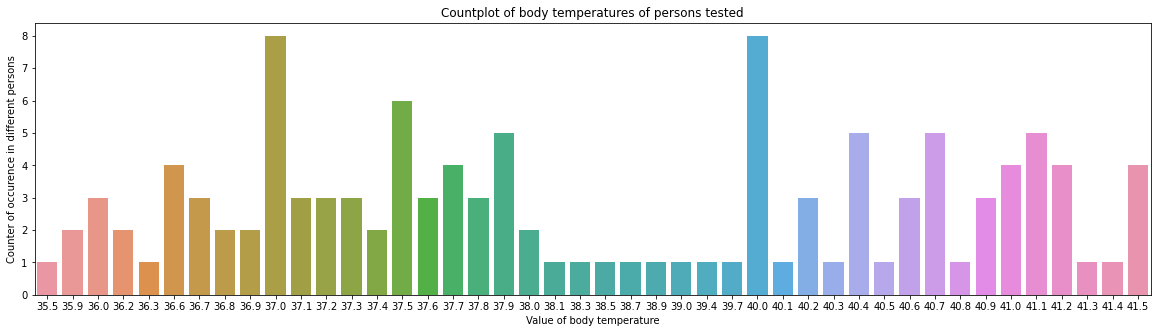

In [19]:
# Countplot
plt.figure(figsize= (20, 5) )
seaborn.countplot(data['Temperature'])
plt.title('Countplot of body temperatures of persons tested')
plt.xlabel('Value of body temperature')
plt.ylabel('Counter of occurence in different persons')
plt.show()

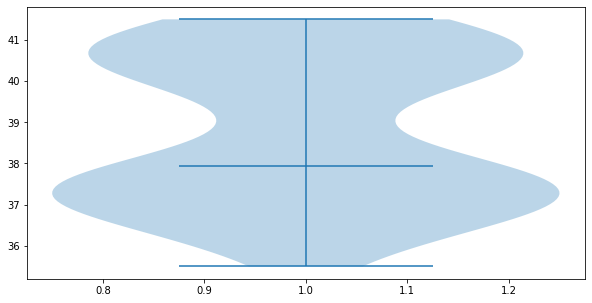

In [20]:
# Violin plot of Temperature variable
plt.figure(figsize= (10, 5) )
plt.violinplot(data['Temperature'], showmedians=True)
plt.show()

In [21]:
# Correlation matrix
correlation= data.corr().round(decimals= 3)
correlation

,Temperature,Nausea,Lumbar pain,Urine pushing,Micturition pains,Burning,Inflammation in urinary bladder,Nephritis of renal pelvis origin
Temperature,1.000,0.593,0.392,-0.019,0.060,0.037,-0.237,0.737
Nausea,0.593,1.000,0.477,-0.014,0.574,-0.122,0.185,0.668
Lumbar pain,0.392,0.477,1.000,-0.239,-0.183,0.029,-0.521,0.714
Urine pushing,-0.019,-0.014,-0.239,1.000,0.342,0.598,0.695,0.239
Micturition pains,0.060,0.574,-0.183,0.342,1.000,0.149,0.667,0.149
Burning,0.037,-0.122,0.029,0.598,0.149,1.000,0.149,0.314
Inflammation in urinary bladder,-0.237,0.185,-0.521,0.695,0.667,0.149,1.000,-0.189
Nephritis of renal pelvis origin,0.737,0.668,0.714,0.239,0.149,0.314,-0.189,1.000


Highest correlation is between 'Temperature' and 'Nephritis of renal pelvis origin' : 0.737 .
Lowest correlation is between 'Lumbar pain' and 'Inflammation in urinary bladder' : -0.521 .

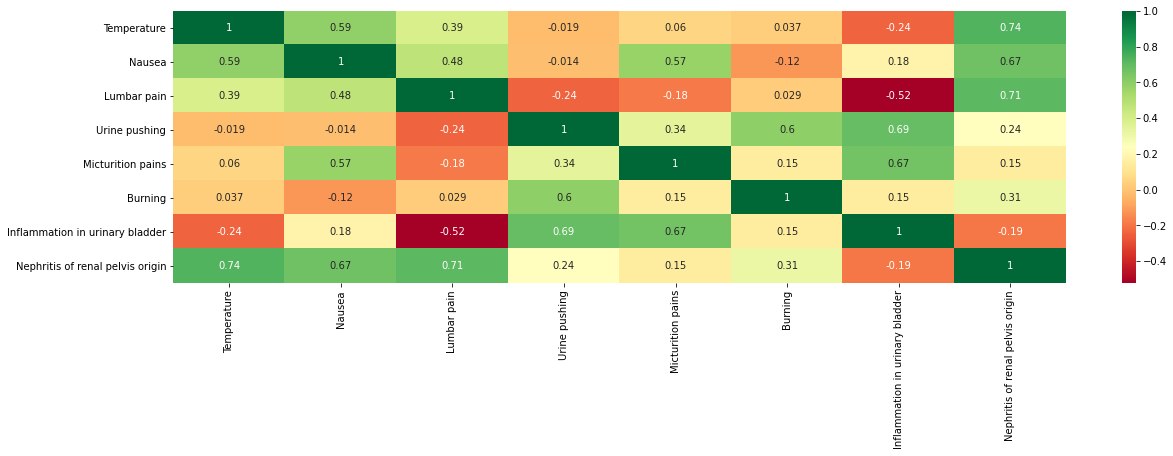

In [22]:
# Plotting heatmap from correlation matrix. It visualizes correlation between every variables in tabular form.
plt.figure(figsize= (20, 5))
seaborn.heatmap(correlation, annot= True, cmap= 'RdYlGn')
plt.show()

In [23]:
# Checking null values of variables in our dataframe.
data.isnull().sum()

Temperature                         0
Nausea                              0
Lumbar pain                         0
Urine pushing                       0
Micturition pains                   0
Burning                             0
Inflammation in urinary bladder     0
Nephritis of renal pelvis origin    0
dtype: int64

In [24]:
# Checking duplicate values of variables in our dataframe.
data.duplicated().sum()

21

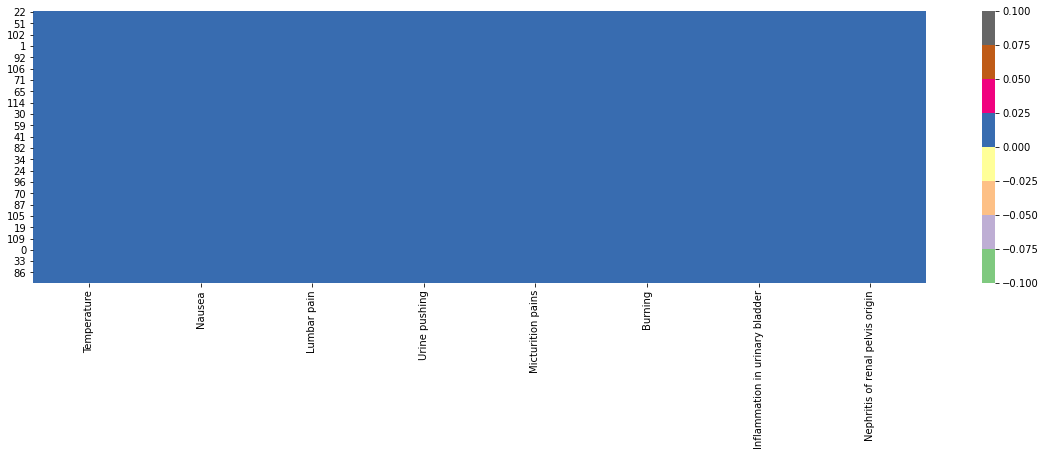

In [25]:
# Heatmap of null values
plt.figure(figsize= (20, 5))
seaborn.heatmap(data.isnull(), cmap= 'Accent')
# As no variable has null value, and nullness value = 0 (same) for each variable, so colour of graph is same everywhere.
plt.show()

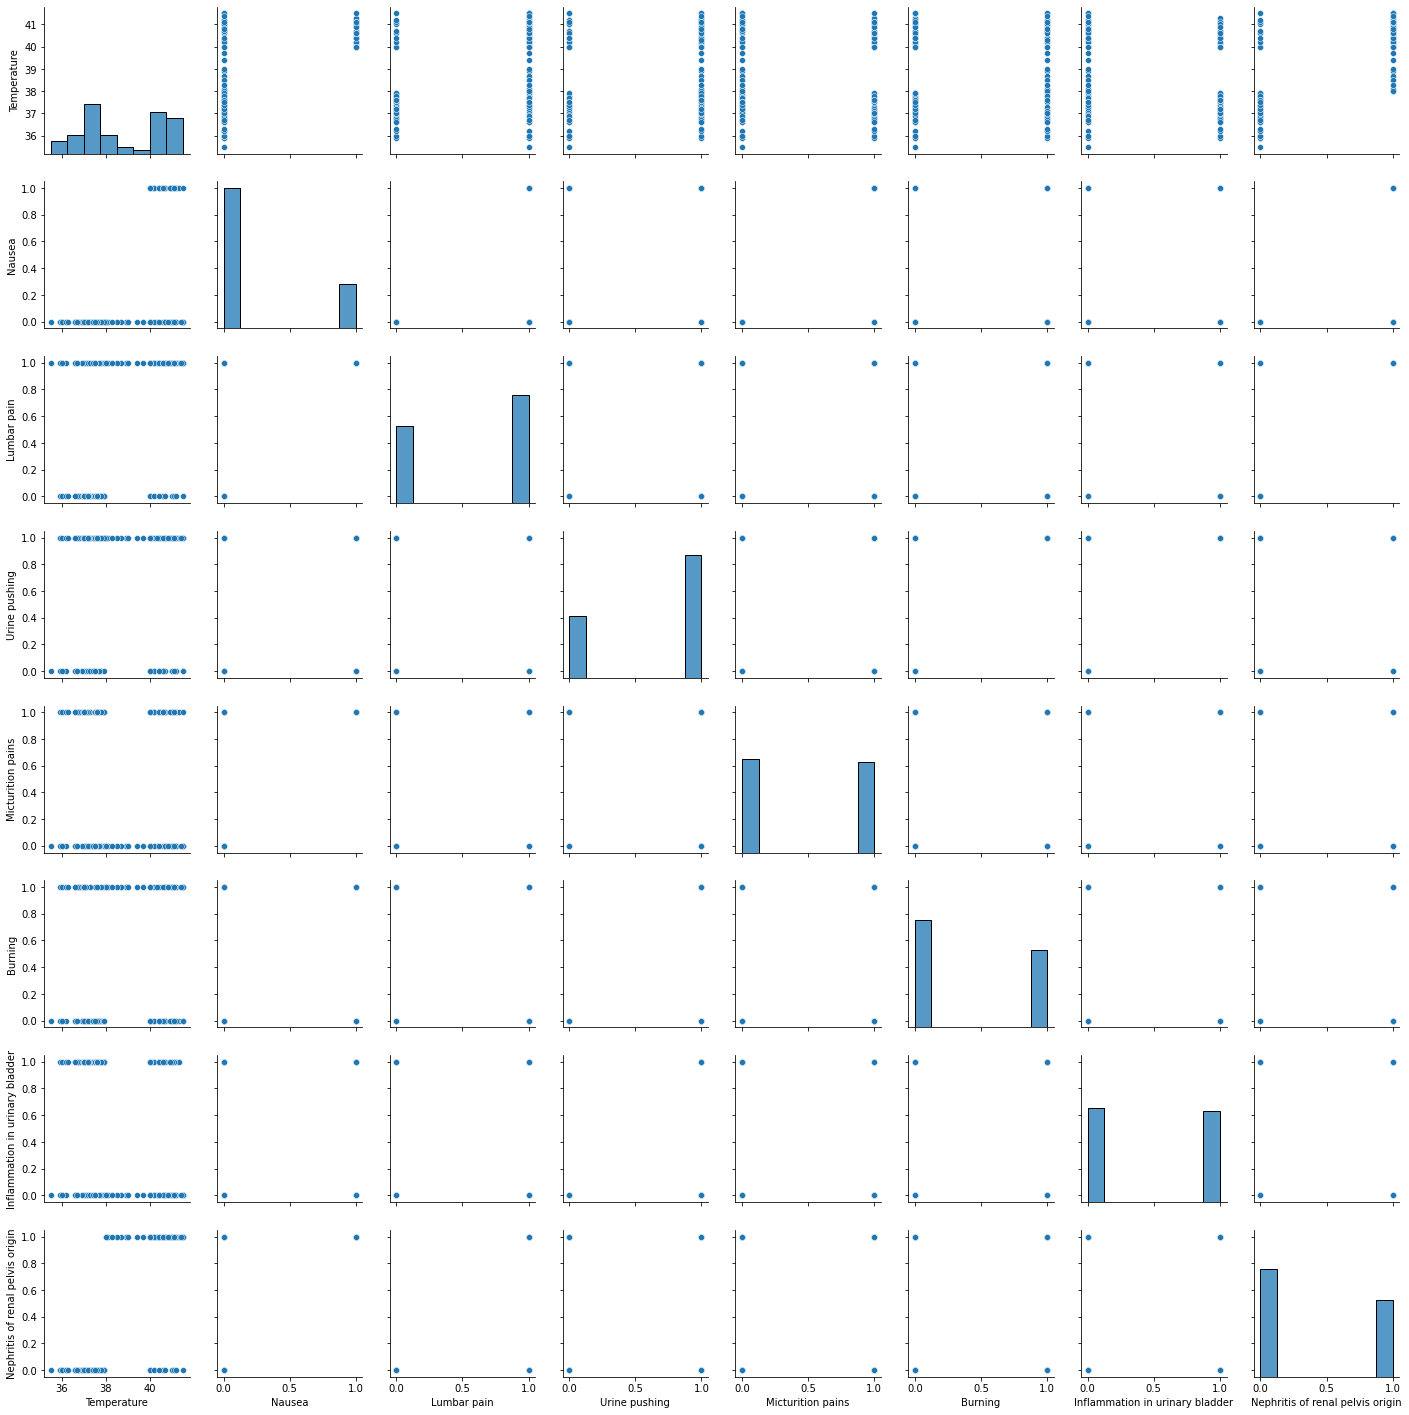

In [26]:
# Plotting pairplots : It gives histogram and scatter plots for each variable.
seaborn.pairplot(data)
plt.show()

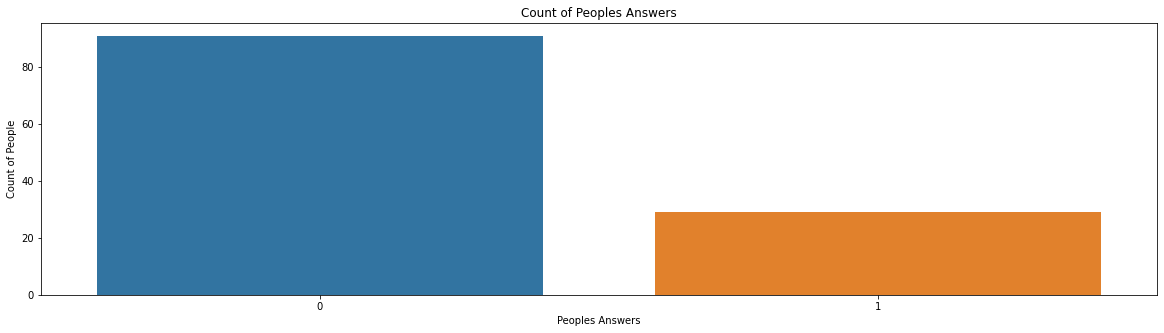

In [27]:
plt.figure(figsize= (20, 5) )
seaborn.countplot(data['Nausea'])
plt.title('Count of Peoples Answers')
plt.xlabel('Peoples Answers')
plt.ylabel('Count of People')
plt.show()

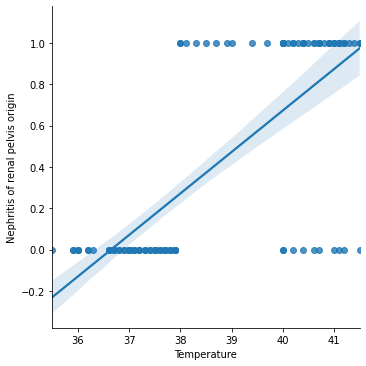

In [43]:
# Lmplot (correlation value= 0.74)
seaborn.lmplot(x='Temperature', y='Nephritis of renal pelvis origin', data=data)
plt.show()

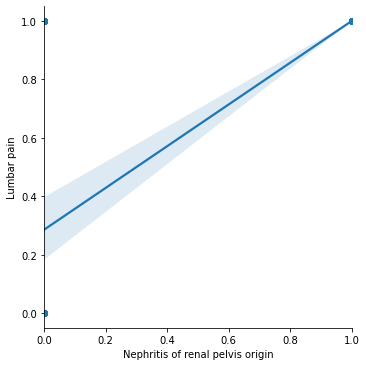

In [44]:
# Lmplot (correlation value= 0.71)
seaborn.lmplot(x='Nephritis of renal pelvis origin', y='Lumbar pain', data=data)
plt.show()

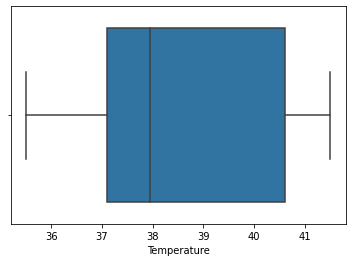

In [30]:
# Boxplot of temperature variable
seaborn.boxplot(data['Temperature'])
plt.show()

In [31]:
# Splitting the data into train and test sets
features= ['Temperature', 'Nausea', 'Lumbar pain', 'Urine pushing',
       'Micturition pains', 'Burning', 'Inflammation in urinary bladder']
labels= ['Nephritis of renal pelvis origin']
x= data[features]
y= data[labels]
x_train, x_test, y_train, y_test= train_test_split(x, y, test_size= 0.1, random_state= 1)
print('Shape of training set is : ', x_train.shape)
print('Shape of testing set is : ', x_test.shape)

Shape of training set is :  (108, 7)
Shape of testing set is :  (12, 7)


In [32]:
# Fitting our model and checking magnitude of errors 
lr= LinearRegression()
lr.fit(x_train, y_train)
y_pred= lr.predict(x_test)
print('Mean squared error is : ', mean_squared_error(y_test, y_pred) )
print('Root mean squared error is : ', numpy.sqrt (mean_squared_error(y_test, y_pred)) )
print('Mean absolute error is : ', mean_absolute_error(y_test, y_pred) )
print('r2 score is : ', r2_score(y_test, y_pred) )

Mean squared error is :  1.388904112279903e-31
Root mean squared error is :  3.726800386765976e-16
Mean absolute error is :  3.0240331211828233e-16
r2 score is :  1.0


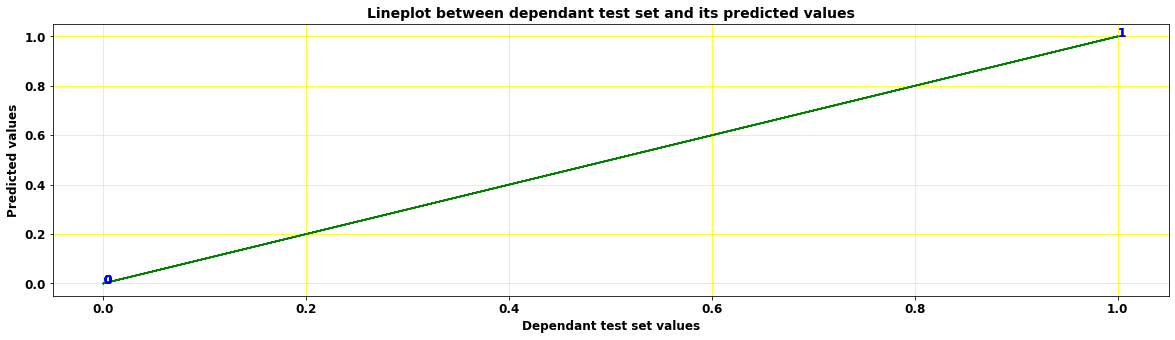

In [33]:
# Lineplot between dependant test set and its predicted values
plt.figure(figsize= (20, 5))
plt.plot(y_test['Nephritis of renal pelvis origin'] , y_pred, color= 'green', linewidth= 1.5 )
plt.grid(color= 'yellow')
plt.title('Lineplot between dependant test set and its predicted values', fontsize= 14, fontweight= 'bold')
plt.xlabel('Dependant test set values', fontsize= 12, fontweight= 'bold')
plt.ylabel('Predicted values', fontsize= 12, fontweight= 'bold')
plt.xticks(fontsize= 12, fontweight= 'bold')
plt.yticks(fontsize= 12, fontweight= 'bold')
for x, y in zip(y_test['Nephritis of renal pelvis origin'] , y_pred):
  plt.text(x, y, str(x), fontsize= 12, fontweight= 'bold', color= 'blue')
plt.show()